## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [7]:
os.getcwd()

'/Users/achaube/Desktop/GA/GeneralAssembly/lessons/lesson-5'

In [47]:
print(open('/Users/achaube/Desktop/GA/GeneralAssembly/lessons/lesson-5/temp_data.txt').read())

% File Generated: 02-Feb-2012 02:05:25
% Dataset Collection: US First Order Summary of the Day
% Type: TAVG - Monthly
% Version: LATEST
% Dataset Hash: 466f8f5f8b93d97afd30e615ede8dfc5
% 
% ------------------------------------
% 
% This file is a plain text export of a portion of the temperature data contained 
% in Berkeley Earth Surface Temperature Analysis.
% 
% The associated dataset name and type of data is shown above, while this file 
% should have the name
% 
% 	data.txt
% 
% For general information about this data product, please refer to the data set 
% readme file: README.txt
% 
% The current file is the "data" export, which contains the temperature data in 
% tab delimited columnar format.  Secondary data including quality control flags 
% and station metadata can be found in other files in the same directory and 
% should be distributed together.
% 
% The columns contained in this file are as follows:
% 
% 	Station ID: A unique integer identifying each station.  Metadata f

In [58]:
temp_data = pd.read_csv('/Users/achaube/Desktop/GA/GeneralAssembly/lessons/lesson-5/temp_data.txt', header = None,names=['StationID', 'SeriesNumber', 'Date', 'Temperature', 'Uncertainty', 'Observations', 'TimeofObservation'], comment = '%', delim_whitespace = True)

In [59]:
temp_data.head()

StationID  SeriesNumber      Date  Temperature  Uncertainty  Observations  \
0      25398             1  1986.708       26.611       0.0507            30   
1      25398             1  1986.875       27.593       0.0507            30   
2      25398             1  1986.958       28.226       0.0499            31   
3      25398             1  1987.042       27.581       0.0499            31   
4      25398             1  1987.125       27.996       0.0525            28   

   TimeofObservation  
0                 24  
1                 24  
2                 24  
3                 24  
4                 24

In [67]:
temp_data.size
temp_data.shape

(141637, 7)

In [68]:
temp_data.describe()

StationID  SeriesNumber           Date    Temperature  \
count  141637.000000      141637.0  141637.000000  141637.000000   
mean   129392.009334           1.0    1997.843697      15.340073   
std      4353.371185           0.0       7.928728     143.821899   
min     25398.000000           1.0    1982.042000     -62.333000   
25%    129432.000000           1.0    1991.042000       5.950000   
50%    129582.000000           1.0    1997.708000      14.037000   
75%    129722.000000           1.0    2004.542000      21.631000   
max    129867.000000           1.0    2011.542000   10000.000000   

         Uncertainty   Observations  TimeofObservation  
count  141637.000000  141637.000000      141637.000000  
mean        0.053938      30.362342          23.990469  
std         0.094698       1.262798           0.281445  
min         0.049900       1.000000          15.000000  
25%         0.049900      30.000000          24.000000  
50%         0.049900      31.000000          24.000000  
75%         0.050700      31.000000          24.000000  
max        10.555600      31.000000          24.000000

In [69]:
temp_X = pd.read_csv('/Users/achaube/Desktop/GA/GeneralAssembly/lessons/lesson-5/temp_X.csv')

In [71]:
temp_X.head()

Unnamed: 0  Station_ID  Series_Number      Date        X
0           0       25398              1  1986.708  79.8998
1           1       25398              1  1986.875  81.6674
2           2       25398              1  1986.958  82.8068
3           3       25398              1  1987.042  81.6458
4           4       25398              1  1987.125  82.3928

In [72]:
temp_X.shape

(141637, 5)

In [73]:
temp_data.head()

StationID  SeriesNumber      Date  Temperature  Uncertainty  Observations  \
0      25398             1  1986.708       26.611       0.0507            30   
1      25398             1  1986.875       27.593       0.0507            30   
2      25398             1  1986.958       28.226       0.0499            31   
3      25398             1  1987.042       27.581       0.0499            31   
4      25398             1  1987.125       27.996       0.0525            28   

   TimeofObservation  
0                 24  
1                 24  
2                 24  
3                 24  
4                 24

In [85]:
temp_data.shape

(141637, 7)

In [89]:
df = pd.concat([temp_data, temp_X['X']], axis=1)

In [90]:
df.head()

StationID  SeriesNumber      Date  Temperature  Uncertainty  Observations  \
0      25398             1  1986.708       26.611       0.0507            30   
1      25398             1  1986.875       27.593       0.0507            30   
2      25398             1  1986.958       28.226       0.0499            31   
3      25398             1  1987.042       27.581       0.0499            31   
4      25398             1  1987.125       27.996       0.0525            28   

   TimeofObservation        X  
0                 24  79.8998  
1                 24  81.6674  
2                 24  82.8068  
3                 24  81.6458  
4                 24  82.3928

In [91]:
df.shape

(141637, 8)

In [93]:
df[['Temperature', 'X']].corr(method='spearman')

Temperature    X
Temperature          1.0  1.0
X                    1.0  1.0

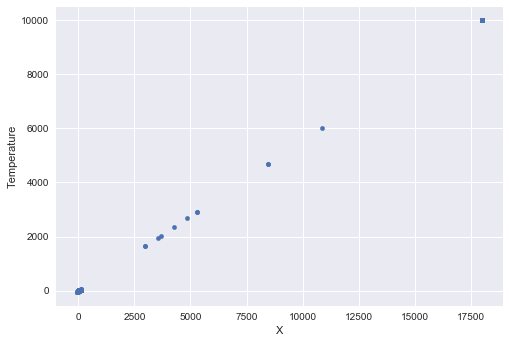

In [155]:
df.plot.scatter(x='X', y='Temperature')
plt.show()

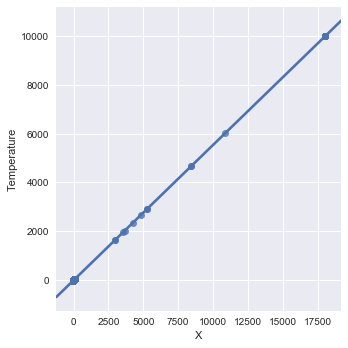

In [156]:
sns.lmplot('X', 'Temperature', df)
sns.plt.show()

In [157]:
##Using StatsModel package
import statsmodels.api as sm
import statsmodels.formula.api as smf
y = df['Temperature']
x = df[['X']]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.087e+36
Date:                Fri, 03 Mar 2017   Prob (F-statistic):               0.00
Time:                        23:19:40   Log-Likelihood:             4.1778e+06
No. Observations:              141637   AIC:                        -8.356e+06
Df Residuals:                  141635   BIC:                        -8.356e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -17.7778   1.02e-16  -1.74e+17      0.0

p-values: [ 1.]
R Square: 1.0
Coefficient: [ 0.55555556]
Intercept: -17.7777777778


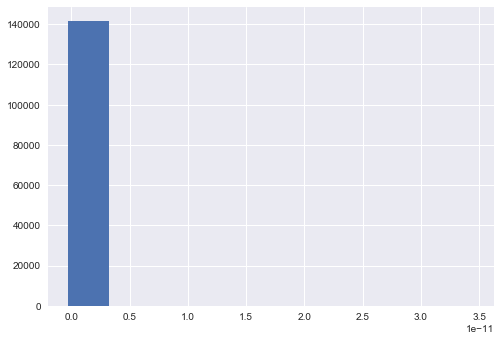

Mean Squared Error:  2.47914259674e-25


In [166]:
## Using scikit learn
from sklearn import feature_selection, linear_model
from sklearn import metrics
y = df['Temperature']
x = df[['X']]
model = linear_model.LinearRegression()
model.fit(x,y)
print "p-values:", (feature_selection.f_regression(x,y)[1])
print "R Square:", (model.score(x,y))
print "Coefficient:", (model.coef_)
print "Intercept:", (model.intercept_)
y_pred = model.predict(x)
residuals = (y - y_pred).values
plt.hist(residuals, bins = 10)
plt.show()



In [167]:
## EVALAUTING FIT OF THE MODEL
#Mean Squared Error
print "Mean Squared Error: ", metrics.mean_squared_error(y,model.predict(x))

#K-fold Cross Validation
from sklearn import cross_validation
kf = cross_validation.KFold(len(df), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:    
    lm = linear_model.LinearRegression().fit(df.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(df.iloc[test_index])))
print np.mean(scores)

/Users/achaube/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


7.80713801363e-26


In [161]:
# Questions
#Interpret your coefficients!
#What is one potential use for this linear regression equation?
#What does this linear regression mean?
#Is this a good model? Why or why not?

The linear regression equation is:
Temperature = 0.556 * X - 17.78

a) Coefficient Interpretation: For every unit increase in the value of X, the temperature increases by 0.556. 

b) Potential use of linear regression equation: For any value of X (including the ones not in the dataset), the value of temperature can be calculated. 

c) Meaning of Linear Regression: The R square of 100% indicates perfect fit, i.e. X variable has explained all of the variance in dependent variable 'Temperature'. The linear regression equation can be used as a formula to calculate Temperature using X. p value of coefficient of X is <0.05 which means it is statistically significant, and residuals plot shows residuals are concentrated at 0 indicating no deviation between predicted and actual y values.

d) Is this a good Model: Yes, the model is a perfect fit. The mean squared error is 0 (very very close to zero = 2.47914259674e-25) which tells us that actual y values are very very close to the regression line (or on the line) and K-fold cross validation score is also 0 (= 7.80713801363e-26) indicating there is no overfitting or bias.


